In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli
import matplotlib as mpl

In [2]:
# Generates rewards matrix of size (2, ktrials)
# ry is a multiple of rb (the double if reward_quotient is set at 2)

def create_rewards(ktrials):
    coeff_r =1
    r=np.random.randint(0,2,size=(ktrials))
    
    rb=coeff_r*r
    ry=reward_quotient*rb 
    
    rewards=np.asarray(np.empty((2,ktrials)))
    rewards[0]=rb
    rewards[1]=ry
    return (rewards)

In [3]:
#Generates choice array  of size 2

def choice (mb,my):
    Py = np.exp(beta * my) / (np.exp(beta * my) + np.exp(beta * mb))
        
    cy = bernoulli.rvs(Py)
    cb = - cy +1
    return [cb,cy]

In [4]:
# Returns the estimated and effective rewards, and the energy spent.
# Respectively 2 floats, an array of size (ktrials) and a float 

def r_E_calcul(cb,cy,r_E_variables,rewards,i):
    r_E_variables["expected_rb"] = (1 - lambda_r * cb) * r_E_variables["expected_rb"] + lambda_r*rewards[0][i] * cb
    r_E_variables["expected_ry"] = (1 - lambda_r * cy) * r_E_variables["expected_ry"] + lambda_r*rewards[1][i] * cy
    
    
    r_E_variables["E"] += (abs(r_E_variables["dmb"]) + abs(r_E_variables["dmy"]))*energy_factor
    
    r_E_variables["reward_received"][i] = rewards[0][i]*cb+rewards[1][i]*cy
      
    return[r_E_variables["expected_rb"],r_E_variables["expected_ry"],r_E_variables["reward_received"], r_E_variables["E"]]

In [65]:
# Generates an array of the expected rewards of size (2,ktrials)

def r_r_exp(rewards, beta):
    m_max=1
    x=1
    
    eps = 0.05
    
    r_r_exp = np.empty((2,ktrials))
    mb = 0
    my = 0
    
    r_E_variables = { "expected_rb" : 0,
                    "expected_ry" : 0,
                    "reward_received" : np.empty(ktrials),
                    "E" : 0}
    
    for i in range (ktrials) :
        
        [cb,cy]=choice(mb,my)
        
        r_E_variables["dmb"] = cb * eps * (rewards[0][i] - r_E_variables["expected_rb"]) * (x - mb/m_max)
        
        if mb + r_E_variables["dmb"] < 0 :
            r_E_variables["dmb"] = 0 - mb
        
        if mb + r_E_variables["dmb"] > m_max :
            r_E_variables["dmb"]= m_max - mb
        
        mb += r_E_variables["dmb"]
        
        r_E_variables["dmy"] = cy * eps * (rewards[1][i] - r_E_variables["expected_ry"]) * (x - my/m_max)
        
        if my + r_E_variables["dmy"] < 0 :
            r_E_variables["dmy"] = 0 - my
        
        if my + r_E_variables["dmy"] > m_max :
            r_E_variables["dmy"]= m_max - my
        
        my += r_E_variables["dmy"]
    
        
        [r_E_variables["expected_rb"],r_E_variables["expected_ry"],r_E_variables["reward_received"], r_E_variables["E"]]=r_E_calcul(cb,cy,r_E_variables,rewards,i)
        
        r_r_exp[0,i]=abs(rewards[0][i] - r_E_variables["expected_rb"])*cb 
        r_r_exp[1,i]=abs(rewards[1][i] - r_E_variables["expected_ry"])*cy
    return r_r_exp


In [6]:
# Parameters setting
ktrials = 200
lambda_r=0.1
beta=7
reward_quotient = 2
energy_factor=30

Text(0, 0.5, 'Expected reward - reward obtained')

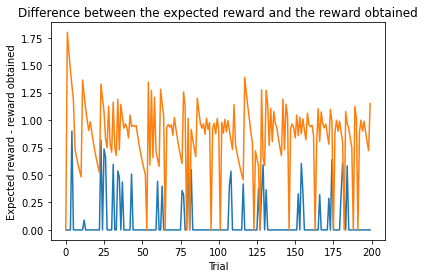

In [69]:
# Difference between the expected reward and the reward obtained as a function of trials
plt.plot(r_r_exp(create_rewards(ktrials), beta)[0])
plt.plot(r_r_exp(create_rewards(ktrials), beta)[1])
plt.title("Difference between the expected reward and the reward obtained")
plt.xlabel("Trial")
plt.ylabel("Expected reward - reward obtained")